In [1]:
# 1. IMPORT LIBRARY
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

In [2]:
# Memuat dataset
phy_data = pd.read_csv("physionet_heart_data.csv")

In [3]:
phy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Columns: 167 entries, Unnamed: 0 to ageCat
dtypes: float64(119), int64(33), object(15)
memory usage: 2.6+ MB


In [4]:
# Tampilkan jumlah baris dan kolom sebelum pra-pemrosesan
print("Jumlah baris dan kolom sebelum pra-pemrosesan:", phy_data.shape)

Jumlah baris dan kolom sebelum pra-pemrosesan: (2008, 167)


In [5]:
phy_data.head(50)

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
0,1,857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,...,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,11,"(69,79]"
1,2,743087,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8,"(69,79]"
2,3,866418,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(59,69]"
3,4,775928,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,11,"(69,79]"
4,5,810128,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(69,79]"
5,6,823318,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,6,"(79,89]"
6,7,844094,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,2,Male,36.0,...,37.0,93.0,78.0,92.9,13.5,1.13,124.0,15,10,"(79,89]"
7,8,787530,HealthcareFacility,Cardiology,Emergency,UrbanResident,Cardiology,1,Female,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,27,"(69,79]"
8,9,795420,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.2,...,37.0,98.0,103.0,97.1,7.3,1.13,98.0,15,20,"(79,89]"
9,10,829801,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.5,...,37.0,87.0,56.0,86.6,13.9,1.07,135.0,15,4,"(69,79]"


In [6]:
phy_data.describe()

,Unnamed: 0,inpatient.number,visit.times,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,...,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay
count,2008.00000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,...,992.000000,993.0,993.000000,993.000000,992.000000,993.000000,993.000000,992.000000,2008.000000,2008.000000
mean,1004.50000,797747.542829,1.092629,36.416484,85.235060,19.085657,131.056773,76.573207,94.734396,52.483715,...,0.605645,37.0,95.806647,108.121853,94.938710,14.022457,1.110393,124.088710,14.831175,9.420817
std,579.80399,41127.801740,0.365946,0.439529,21.539214,1.737546,24.741670,14.461247,16.323762,10.895935,...,0.560946,0.0,6.212864,37.422666,6.205458,4.153747,0.052645,24.638623,1.179836,8.030256
min,1.00000,722128.000000,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,37.0,25.000000,20.000000,24.300000,-1.200000,0.890000,35.000000,3.000000,1.000000
25%,502.75000,763164.500000,1.000000,36.200000,70.000000,18.000000,113.000000,65.000000,83.333333,45.000000,...,0.300000,37.0,95.000000,80.000000,94.500000,11.700000,1.080000,110.000000,15.000000,6.000000
50%,1004.50000,798758.000000,1.000000,36.300000,82.000000,19.000000,130.000000,76.000000,93.333333,50.000000,...,0.400000,37.0,98.000000,102.000000,96.600000,13.800000,1.110000,127.000000,15.000000,8.000000
75%,1506.25000,829399.750000,1.000000,36.500000,98.000000,19.000000,146.250000,85.000000,104.666667,60.000000,...,0.800000,37.0,99.000000,134.000000,97.800000,16.100000,1.140000,139.000000,15.000000,10.000000
max,2008.00000,905720.000000,5.000000,42.000000,198.000000,36.000000,252.000000,146.000000,181.333333,115.000000,...,5.300000,37.0,100.000000,255.000000,99.100000,43.700000,1.390000,203.000000,15.000000,123.000000


In [7]:
# Melihat jumlah missing values per kolom
phy_data.isnull().sum()

Unnamed: 0                 0
inpatient.number           0
DestinationDischarge       0
admission.ward             0
admission.way              0
                        ... 
free.calcium            1015
total.hemoglobin        1016
GCS                        0
dischargeDay               0
ageCat                     0
Length: 167, dtype: int64

In [8]:
# 1. Hitung jumlah missing value di setiap kolom
missing_counts = phy_data.isnull().sum()

# 2. Hitung persentase missing value berdasarkan total jumlah baris
missing_percentage = (missing_counts / len(phy_data)) * 100

# 3. Gabungkan ke dalam DataFrame baru
missing_data = pd.DataFrame({
    "Jumlah Missing": missing_counts,
    "Persentase Missing (%)": missing_percentage
})

# 4. Filter: hanya tampilkan kolom yang memiliki missing value (> 0)
missing_data = missing_data[missing_data["Jumlah Missing"] > 0]

# 5. Urutkan dari persentase missing tertinggi ke terendah (opsional, tapi membantu)
missing_data = missing_data.sort_values(by="Persentase Missing (%)", ascending=False)

# 6. Tampilkan hasil akhir
print(missing_data)

                                                Jumlah Missing  \
cholinesterase                                            2008   
time.of.death..days.from.admission.                       1964   
homocysteine                                              1862   
apolipoprotein.A                                          1832   
apolipoprotein.B                                          1832   
...                                                        ...   
CCI.score                                                    5   
peptic.ulcer.disease                                         2   
moderate.to.severe.chronic.kidney.disease                    2   
return.to.emergency.department.within.6.months               1   
liver.disease                                                1   

                                                Persentase Missing (%)  
cholinesterase                                              100.000000  
time.of.death..days.from.admission.                          

In [9]:
# Hapus kolom yang tidak diperlukan
df = phy_data.drop(['Unnamed: 0', 'inpatient.number', 'DestinationDischarge', 'admission.ward', 'admission.way',
                    'occupation', 'discharge.department', 'visit.times', 'dischargeDay'], axis=1)

In [10]:
# Buat variabel outcome_rd
df['outcome_rd'] = df['death.within.6.months'] + df['re.admission.within.6.months']

In [11]:
# Hapus kolom terkait hasil lainnya
df = df.drop(['death.within.28.days', 'death.within.3.months', 'death.within.6.months',
              're.admission.within.28.days', 're.admission.within.3.months', 're.admission.within.6.months',
              'time.of.death..days.from.admission.', 're.admission.time..days.from.admission.',
              'return.to.emergency.department.within.6.months',
              'time.to.emergency.department.within.6.months', 'outcome.during.hospitalization'], axis=1)

In [12]:
# Tampilkan jumlah baris dan kolom setelah pra-pemrosesan
print("Jumlah baris dan kolom setelah pra-pemrosesan:", df.shape)

Jumlah baris dan kolom setelah pra-pemrosesan: (2008, 148)


In [13]:
# Enkode variabel kategori menjadi numerik
mapping = {
    'gender': {'Male': 0, 'Female': 1},
    'type.of.heart.failure': {'Both': 0, 'Right': 1, 'Left': 2},
    'NYHA.cardiac.function.classification': {'III': 0, 'II': 1, 'IV': 2},
    'Killip.grade': {'III': 0, 'I': 1, 'II': 2, 'IV': 3},
    'type.II.respiratory.failure': {'NonTypeII': 0, 'TypeII': 1},
    'consciousness': {'Clear': 0, 'ResponsiveToPain': 1, 'ResponsiveToSound': 2, 'Nonresponsive': 3},
    'respiratory.support.': {'None': 0, 'NIMV': 1, 'IMV': 2},
    'oxygen.inhalation': {'OxygenTherapy': 0, 'AmbientAir': 1},
    'ageCat': {'(69,79]': 5, '(59,69]': 4, '(79,89]': 6, '(49,59]': 3, '(89,110]': 7,
               '(29,39]': 1, '(39,49]': 2, '(21,29]': 0}
}

df = df.replace(mapping)

In [14]:
# Pisahkan fitur (df_x) dan target (df_y)
df_x = df.drop('outcome_rd', axis=1)
df_y = df['outcome_rd']

In [15]:
# Hapus fitur dengan nilai yang hilang lebih dari 50%
missing_threshold = 0.5
missing_percentages = df_x.isnull().mean()
df_x = df_x.loc[:, missing_percentages < missing_threshold]

In [16]:
# Tampilkan jumlah baris dan kolom setelah menghapus fitur dengan nilai yang hilang lebih dari 50%
print("Jumlah baris dan kolom setelah menghapus fitur dengan nilai yang hilang lebih dari 50%:", df_x.shape)

Jumlah baris dan kolom setelah menghapus fitur dengan nilai yang hilang lebih dari 50%: (2008, 107)


In [17]:
# 1. Hitung jumlah missing value di setiap kolom
missing_counts = df_x.isnull().sum()

# 2. Hitung persentase missing value berdasarkan total jumlah baris
missing_percentage = (missing_counts / len(phy_data)) * 100

# 3. Gabungkan ke dalam DataFrame baru
missing_data = pd.DataFrame({
    "Jumlah Missing": missing_counts,
    "Persentase Missing (%)": missing_percentage
})

# 4. Filter: hanya tampilkan kolom yang memiliki missing value (> 0)
missing_data = missing_data[missing_data["Jumlah Missing"] > 0]

# 5. Urutkan dari persentase missing tertinggi ke terendah (opsional, tapi membantu)
missing_data = missing_data.sort_values(by="Persentase Missing (%)", ascending=False)

# 6. Tampilkan hasil akhir
print(missing_data)

                                            Jumlah Missing  \
left.ventricular.end.diastolic.diameter.LV             697   
nucleotidase                                           529   
fucosidase                                             529   
total.bile.acid                                        510   
glutamic.oxaloacetic.transaminase                      253   
...                                                    ...   
carbon.dioxide.binding.capacity                         11   
CCI.score                                                5   
moderate.to.severe.chronic.kidney.disease                2   
peptic.ulcer.disease                                     2   
liver.disease                                            1   

                                            Persentase Missing (%)  
left.ventricular.end.diastolic.diameter.LV               34.711155  
nucleotidase                                             26.344622  
fucosidase                                      

## Base Model Tanpa Imputation & Standarisasi

In [18]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42, stratify=df_y)

In [19]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Prediksi
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

Evaluasi Random Forest tanpa imputasi dan tanpa standarisasi
Accuracy: 0.6244
Precision: 0.5949
Recall: 0.2831
F1 Score: 0.3837
ROC AUC Score: 0.5738


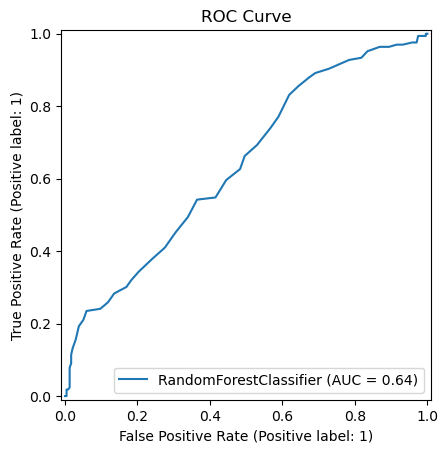

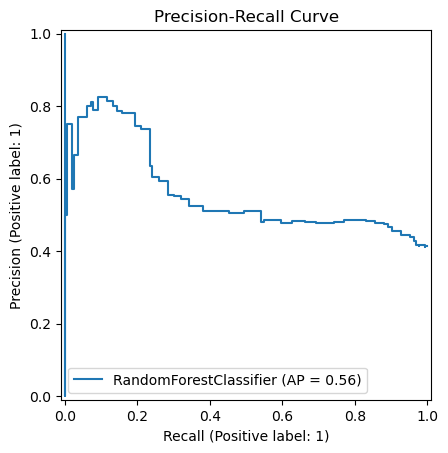


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       236
           1       0.59      0.28      0.38       166

    accuracy                           0.62       402
   macro avg       0.61      0.57      0.56       402
weighted avg       0.62      0.62      0.59       402



In [21]:
# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.show()

    # Plot Precision-Recall Curve
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title('Precision-Recall Curve')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluasi model Random Forest
print("Evaluasi Random Forest tanpa imputasi dan tanpa standarisasi")
evaluate_model(rf_model, X_test, y_test)

In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Fungsi untuk melakukan cross-validation dan menampilkan hasilnya
def cross_validate_model(model, X, y, cv_splits=10):
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

    for metric in scoring[1:]:
        scores = cross_val_score(model, X, y, cv=skf, scoring=metric)
        print(f"Cross-Validation {metric.capitalize()}: {scores.mean():.4f} ± {scores.std():.4f}")

# Lakukan validasi untuk model tanpa imputasi dan standarisasi
print("Cross-validation for model WITHOUT imputation and standardization")
cross_validate_model(rf_model, df_x, df_y)

Cross-validation for model WITHOUT imputation and standardization
Cross-Validation Accuracy: 0.6295 ± 0.0250
Cross-Validation Precision: 0.5988 ± 0.0581
Cross-Validation Recall: 0.3241 ± 0.0261
Cross-Validation F1: 0.4197 ± 0.0320
Cross-Validation Roc_auc: 0.6470 ± 0.0351



Top 5 Fitur Paling Berpengaruh:
                                   Feature  Importance
left.ventricular.end.diastolic.diameter.LV    0.030837
                glomerular.filtration.rate    0.018015
                                 uric.acid    0.017607
               creatinine.enzymatic.method    0.017545
                 high.sensitivity.troponin    0.017010

Top 5 Fitur Paling Tidak Berpengaruh:
            Feature  Importance
         hemiplegia    0.000053
acute.renal.failure    0.000023
           leukemia    0.000000
 malignant.lymphoma    0.000000
               AIDS    0.000000


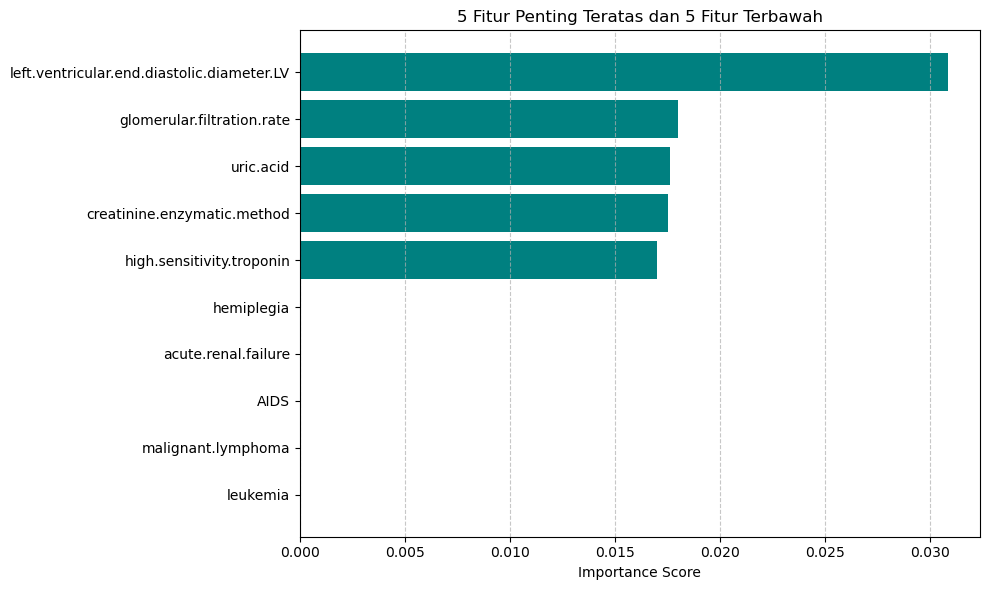

In [23]:
# Hitung feature importance
importances = rf_model.feature_importances_
feature_names = df_x.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Ambil 5 fitur terpenting dan 5 terbawah
top_5 = feature_importance_df.head(5)
bottom_5 = feature_importance_df.tail(5)

# Gabungkan untuk visualisasi
combined = pd.concat([top_5, bottom_5])
combined_sorted = combined.sort_values(by='Importance', ascending=True)

# Tampilkan hasil dalam tabel
print("\nTop 5 Fitur Paling Berpengaruh:")
print(top_5.to_string(index=False))

print("\nTop 5 Fitur Paling Tidak Berpengaruh:")
print(bottom_5.to_string(index=False))

# Visualisasi diagram batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(combined_sorted['Feature'], combined_sorted['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('5 Fitur Penting Teratas dan 5 Fitur Terbawah')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Experiment Model

In [24]:
# Fungsi untuk melakukan imputasi dan mengembalikan DataFrame
def impute_and_return_df(imputer, df_x):
    df_x_imputed = imputer.fit_transform(df_x)
    return pd.DataFrame(df_x_imputed, columns=df_x.columns)

### KNN Imputer

In [25]:
# Periksa nilai null SEBELUM imputasi
missing_counts = df_x.isnull().sum()
missing_percentage = (missing_counts / len(phy_data)) * 100
missing_data = pd.DataFrame({
    "Jumlah Missing": missing_counts,
    "Persentase Missing (%)": missing_percentage
})

# Tampilkan hanya yang jumlah missing-nya lebih dari 0
missing_data = missing_data[missing_data["Jumlah Missing"] > 0]

print(missing_data)

                                            Jumlah Missing  \
peptic.ulcer.disease                                     2   
moderate.to.severe.chronic.kidney.disease                2   
liver.disease                                            1   
CCI.score                                                5   
left.ventricular.end.diastolic.diameter.LV             697   
...                                                    ...   
total.protein                                          102   
cholesterol                                            198   
low.density.lipoprotein.cholesterol                    198   
triglyceride                                           198   
high.density.lipoprotein.cholesterol                   198   

                                            Persentase Missing (%)  
peptic.ulcer.disease                                      0.099602  
moderate.to.severe.chronic.kidney.disease                 0.099602  
liver.disease                                   

In [26]:
# Imputasi nilai yang hilang dengan berbagai metode
# 1. KNN Imputer
knn_imputer = KNNImputer()
df_x_knn = impute_and_return_df(knn_imputer, df_x)

In [27]:
# Periksa nilai null setelah imputasi
print("Jumlah nilai null setelah KNN Imputer:\n", df_x_knn.isnull().sum())

Jumlah nilai null setelah KNN Imputer:
 gender                                  0
body.temperature                        0
pulse                                   0
respiration                             0
systolic.blood.pressure                 0
                                       ..
low.density.lipoprotein.cholesterol     0
triglyceride                            0
high.density.lipoprotein.cholesterol    0
GCS                                     0
ageCat                                  0
Length: 107, dtype: int64


In [28]:
# 1. Hitung jumlah missing value di setiap kolom
missing_counts = df_x_knn.isnull().sum()

# 2. Hitung persentase missing value berdasarkan total jumlah baris
missing_percentage = (missing_counts / len(phy_data)) * 100

# 3. Gabungkan ke dalam DataFrame baru
missing_data = pd.DataFrame({
    "Jumlah Missing": missing_counts,
    "Persentase Missing (%)": missing_percentage
})

# 4. Filter: hanya tampilkan kolom yang memiliki missing value (> 0)
missing_data = missing_data[missing_data["Jumlah Missing"] > 0]

# 5. Urutkan dari persentase missing tertinggi ke terendah (opsional, tapi membantu)
missing_data = missing_data.sort_values(by="Persentase Missing (%)", ascending=False)

# 6. Tampilkan hasil akhir
print(missing_data)

Empty DataFrame
Columns: [Jumlah Missing, Persentase Missing (%)]
Index: []


In [29]:
# Standarisasi df_x
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_x)
df_x_knn = scaler.fit_transform(df_x_knn)

In [30]:
# Tampilkan hasil standarisasi
print("Hasil standarisasi df_x_knn:")
print(df_x_knn)

Hasil standarisasi df_x_knn:
[[ -1.1731715    0.64520508   0.0819612  ...  -0.7551263    0.14312735
   -0.01390505]
 [  0.8523903    0.87277785   0.45346931 ...   0.60606809   0.14312735
   -0.01390505]
 [ -1.1731715    0.19005953   0.59278486 ...  -0.45921448   0.14312735
   -0.88644725]
 ...
 [ -1.1731715    0.87277785   1.28936257 ...  -1.05103812   0.14312735
   -2.63153165]
 [ -1.1731715   -0.03751324   2.26457136 ...  -0.6249251  -10.03031428
   -1.75898945]
 [  0.8523903   -0.26508601   0.68566189 ...   0.81320636   0.14312735
    0.85863714]]


In [31]:
# Bagi df_x dan df_y menjadi set pelatihan dan pengujian
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(df_x_knn, df_y, test_size=0.2, random_state=42)

In [32]:
# Buat dan latih model RandomForestClassifier
model_knn = RandomForestClassifier(random_state=42)
model_knn.fit(X_train_knn, y_train_knn)

RandomForestClassifier(random_state=42)

Evaluasi KNN Imputer
Accuracy: 0.6095
Precision: 0.5612
Recall: 0.3254
F1 Score: 0.4120
ROC AUC Score: 0.5704


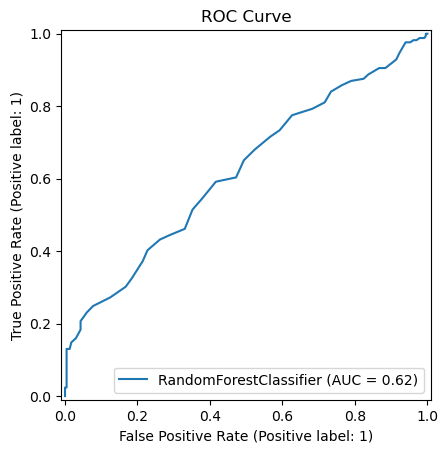

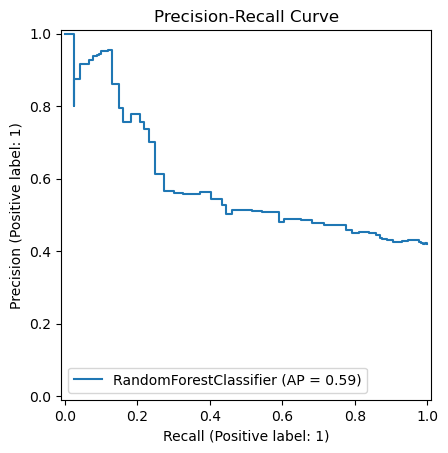


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71       233
           1       0.56      0.33      0.41       169

    accuracy                           0.61       402
   macro avg       0.59      0.57      0.56       402
weighted avg       0.60      0.61      0.58       402



In [33]:
# Evaluasi model dan tampilkan laporan klasifikasi serta visualisasi
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot kurva ROC
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.show()

    # Plot kurva Precision-Recall
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title('Precision-Recall Curve')
    plt.show()
    
        # Tampilkan laporan klasifikasi
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

print("Evaluasi KNN Imputer")
evaluate_model(model_knn, X_test_knn, y_test_knn)

In [34]:
# CROSS VALIDATION
def cross_validate_model(model, X, y, cv_splits=10):
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    for metric in metrics:
        scores = cross_val_score(model, X, y, scoring=metric, cv=skf)
        print(f"{metric.capitalize()} (CV): {scores.mean():.4f} ± {scores.std():.4f}")

print("Cross Validation KNN Imputer")
cross_validate_model(model_knn, df_x_knn, df_y)

Cross Validation KNN Imputer
Accuracy (CV): 0.6389 ± 0.0307
Precision (CV): 0.6223 ± 0.0752
Recall (CV): 0.3325 ± 0.0418
F1 (CV): 0.4318 ± 0.0472
Roc_auc (CV): 0.6559 ± 0.0451


In [35]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
# Fungsi untuk melakukan cross-validation dan menampilkan hasilnya
def cross_validate_model(model, X, y, cv_splits=10):
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

    for metric in scoring[1:]:
        scores = cross_val_score(model, X, y, cv=skf, scoring=metric)
        print(f"Cross-Validation {metric.capitalize()}: {scores.mean():.4f} ± {scores.std():.4f}")
# Cross-validate for each imputed dataset
print("Cross-validation for KNN Imputer")
cross_validate_model(model_knn, df_x_knn, df_y)

Cross-validation for KNN Imputer
Cross-Validation Accuracy: 0.6389 ± 0.0307
Cross-Validation Precision: 0.6223 ± 0.0752
Cross-Validation Recall: 0.3325 ± 0.0418
Cross-Validation F1: 0.4318 ± 0.0472
Cross-Validation Roc_auc: 0.6559 ± 0.0451



=== Feature Importance - KNN Imputer ===
                                         Fitur  Skor Importance
39  left.ventricular.end.diastolic.diameter.LV         0.019962
43                  glomerular.filtration.rate         0.018154
44                                    cystatin         0.017444
74                   high.sensitivity.troponin         0.016843
40                 creatinine.enzymatic.method         0.016684
..                                         ...              ...
38                         acute.renal.failure         0.000083
19                   connective.tissue.disease         0.000048
25                          malignant.lymphoma         0.000044
28                                        AIDS         0.000000
24                                    leukemia         0.000000

[107 rows x 2 columns]


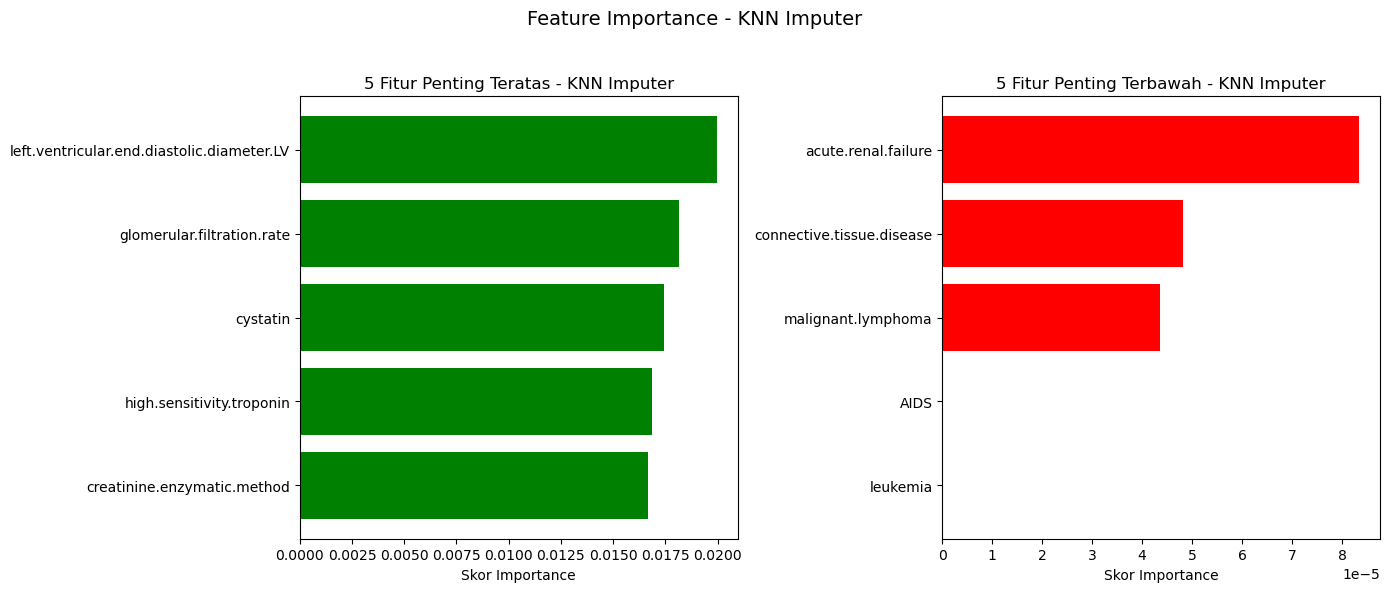

In [36]:
# 8. FEATURE IMPORTANCE & VISUALISASI
def plot_feature_importance(model, X, method_name):
    feature_names = df_x.columns  # df_x tetap digunakan karena fitur tidak berubah meskipun distandarisasi
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Fitur': feature_names,
        'Skor Importance': importances
    }).sort_values(by='Skor Importance', ascending=False)

    # Tampilkan tabel penting (opsional)
    print(f"\n=== Feature Importance - {method_name} ===")
    print(importance_df)

    # Ambil 5 fitur teratas dan terbawah
    top5 = importance_df.head(5)
    bottom5 = importance_df.tail(5)

    # Plot diagram batang horizontal
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Fitur teratas
    axs[0].barh(top5['Fitur'], top5['Skor Importance'], color='green')
    axs[0].set_title(f"5 Fitur Penting Teratas - {method_name}")
    axs[0].invert_yaxis()
    axs[0].set_xlabel("Skor Importance")

    # Fitur terbawah
    axs[1].barh(bottom5['Fitur'], bottom5['Skor Importance'], color='red')
    axs[1].set_title(f"5 Fitur Penting Terbawah - {method_name}")
    axs[1].invert_yaxis()
    axs[1].set_xlabel("Skor Importance")

    plt.suptitle(f"Feature Importance - {method_name}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Panggil fungsi
plot_feature_importance(model_knn, df_x_knn, "KNN Imputer")

### Iterative Imputer

In [37]:
# Periksa nilai null SEBELUM imputasi
missing_counts = df_x.isnull().sum()
missing_percentage = (missing_counts / len(phy_data)) * 100
missing_data = pd.DataFrame({
    "Jumlah Missing": missing_counts,
    "Persentase Missing (%)": missing_percentage
})

# Tampilkan hanya yang jumlah missing-nya lebih dari 0
missing_data = missing_data[missing_data["Jumlah Missing"] > 0]

print(missing_data)

                                            Jumlah Missing  \
peptic.ulcer.disease                                     2   
moderate.to.severe.chronic.kidney.disease                2   
liver.disease                                            1   
CCI.score                                                5   
left.ventricular.end.diastolic.diameter.LV             697   
...                                                    ...   
total.protein                                          102   
cholesterol                                            198   
low.density.lipoprotein.cholesterol                    198   
triglyceride                                           198   
high.density.lipoprotein.cholesterol                   198   

                                            Persentase Missing (%)  
peptic.ulcer.disease                                      0.099602  
moderate.to.severe.chronic.kidney.disease                 0.099602  
liver.disease                                   

In [38]:
# 2. Iterative Imputer
iterative_imputer = IterativeImputer(random_state=42)
df_x_iterative = impute_and_return_df(iterative_imputer, df_x)

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [39]:
print("Jumlah nilai null setelah Iterative Imputer:\n", df_x_iterative.isnull().sum())

Jumlah nilai null setelah Iterative Imputer:
 gender                                  0
body.temperature                        0
pulse                                   0
respiration                             0
systolic.blood.pressure                 0
                                       ..
low.density.lipoprotein.cholesterol     0
triglyceride                            0
high.density.lipoprotein.cholesterol    0
GCS                                     0
ageCat                                  0
Length: 107, dtype: int64


In [40]:
# 1. Hitung jumlah missing value di setiap kolom
missing_counts = df_x_iterative.isnull().sum()
# 2. Hitung persentase missing value berdasarkan total jumlah baris
missing_percentage = (missing_counts / len(phy_data)) * 100

# 3. Gabungkan ke dalam DataFrame baru
missing_data = pd.DataFrame({
    "Jumlah Missing": missing_counts,
    "Persentase Missing (%)": missing_percentage
})

# 4. Filter: hanya tampilkan kolom yang memiliki missing value (> 0)
missing_data = missing_data[missing_data["Jumlah Missing"] > 0]

# 5. Urutkan dari persentase missing tertinggi ke terendah (opsional, tapi membantu)
missing_data = missing_data.sort_values(by="Persentase Missing (%)", ascending=False)

# 6. Tampilkan hasil akhir
print(missing_data)

Empty DataFrame
Columns: [Jumlah Missing, Persentase Missing (%)]
Index: []


In [41]:
# Standarisasi df_x
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_x)
df_x_iterative = scaler.fit_transform(df_x_iterative)

In [42]:
print("\nHasil standarisasi df_x_iterative:")
print(df_x_iterative)


Hasil standarisasi df_x_iterative:
[[ -1.1731715    0.64520508   0.0819612  ...  -0.76898972   0.14312735
   -0.01390505]
 [  0.8523903    0.87277785   0.45346931 ...   0.5872742    0.14312735
   -0.01390505]
 [ -1.1731715    0.19005953   0.59278486 ...  -0.47414973   0.14312735
   -0.88644725]
 ...
 [ -1.1731715    0.87277785   1.28936257 ...  -0.86116639   0.14312735
   -2.63153165]
 [ -1.1731715   -0.03751324   2.26457136 ...  -0.97688696 -10.03031428
   -1.75898945]
 [  0.8523903   -0.26508601   0.68566189 ...   0.79366218   0.14312735
    0.85863714]]


In [43]:
# Bagi df_x dan df_y menjadi set pelatihan dan pengujian
X_train_iterative, X_test_iterative, y_train_iterative, y_test_iterative = train_test_split(df_x_iterative, df_y, test_size=0.2, random_state=42)

In [44]:
# Buat dan latih model RandomForestClassifier
model_iterative = RandomForestClassifier(random_state=42)
model_iterative.fit(X_train_iterative, y_train_iterative)

RandomForestClassifier(random_state=42)


Evaluasi Iterative Imputer
Accuracy: 0.6318
Precision: 0.6082
Recall: 0.3491
F1 Score: 0.4436
ROC AUC Score: 0.5930


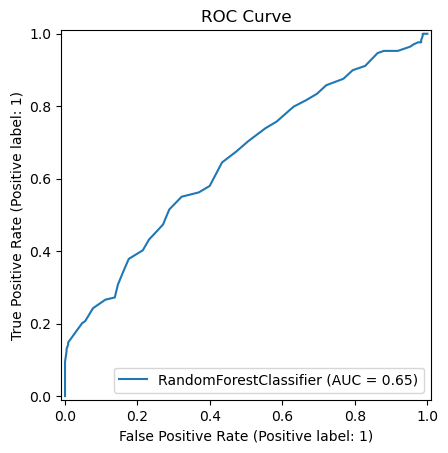

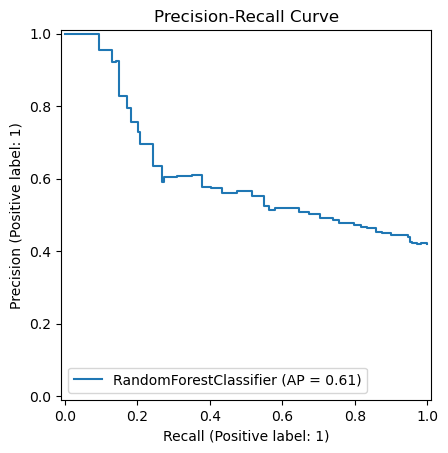


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.84      0.72       233
           1       0.61      0.35      0.44       169

    accuracy                           0.63       402
   macro avg       0.62      0.59      0.58       402
weighted avg       0.63      0.63      0.61       402



In [45]:
# Evaluasi model dan tampilkan laporan klasifikasi serta visualisasi
print("\nEvaluasi Iterative Imputer")
evaluate_model(model_iterative, X_test_iterative, y_test_iterative)

In [46]:
# CROSS VALIDATION
print("Cross Validation Iterative Imputer")
cross_validate_model(model_iterative, df_x_iterative, df_y)

Cross Validation Iterative Imputer
Cross-Validation Accuracy: 0.6280 ± 0.0254
Cross-Validation Precision: 0.5957 ± 0.0616
Cross-Validation Recall: 0.3205 ± 0.0291
Cross-Validation F1: 0.4159 ± 0.0352
Cross-Validation Roc_auc: 0.6518 ± 0.0469



=== Feature Importance - Iterative Imputer ===
                                         Fitur  Skor Importance
39  left.ventricular.end.diastolic.diameter.LV         0.022714
43                  glomerular.filtration.rate         0.020708
40                 creatinine.enzymatic.method         0.017617
74                   high.sensitivity.troponin         0.017049
44                                    cystatin         0.016063
..                                         ...              ...
38                         acute.renal.failure         0.000103
19                   connective.tissue.disease         0.000084
28                                        AIDS         0.000079
25                          malignant.lymphoma         0.000025
24                                    leukemia         0.000000

[107 rows x 2 columns]


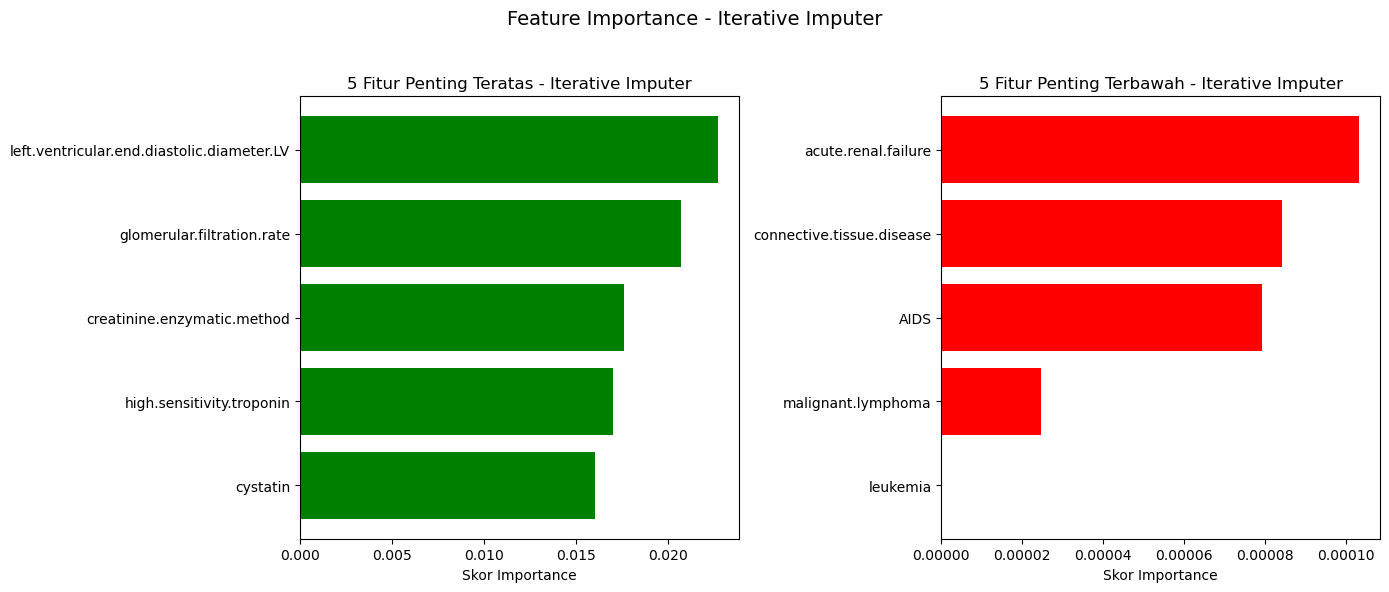

In [47]:
# FEATURE IMPORTANCE & VISUALISASI
plot_feature_importance(model_iterative, df_x_iterative, "Iterative Imputer")

### Random Forest Imputer

In [48]:
# Periksa nilai null SEBELUM imputasi
missing_counts = df_x.isnull().sum()
missing_percentage = (missing_counts / len(phy_data)) * 100
missing_data = pd.DataFrame({
    "Jumlah Missing": missing_counts,
    "Persentase Missing (%)": missing_percentage
})

# Tampilkan hanya yang jumlah missing-nya lebih dari 0
missing_data = missing_data[missing_data["Jumlah Missing"] > 0]

print(missing_data)

                                            Jumlah Missing  \
peptic.ulcer.disease                                     2   
moderate.to.severe.chronic.kidney.disease                2   
liver.disease                                            1   
CCI.score                                                5   
left.ventricular.end.diastolic.diameter.LV             697   
...                                                    ...   
total.protein                                          102   
cholesterol                                            198   
low.density.lipoprotein.cholesterol                    198   
triglyceride                                           198   
high.density.lipoprotein.cholesterol                   198   

                                            Persentase Missing (%)  
peptic.ulcer.disease                                      0.099602  
moderate.to.severe.chronic.kidney.disease                 0.099602  
liver.disease                                   

In [49]:
# 3. Random Forest Imputer
class RandomForestImputer:
    def __init__(self):
        self.model = RandomForestRegressor(n_estimators=10, random_state=42)
        
    def fit_transform(self, X):
        df_temp = X.copy()
        for col in X.columns:
            if df_temp[col].isnull().sum() > 0:
                y = df_temp[col]
                X_train = df_temp.loc[y.notna()].drop(columns=col)
                y_train = y.dropna()
                self.model.fit(X_train, y_train)
                X_test = df_temp.loc[y.isna()].drop(columns=col)
                df_temp.loc[y.isna(), col] = self.model.predict(X_test)
        return df_temp

rf_imputer = RandomForestImputer()
df_x_rf = rf_imputer.fit_transform(df_x)

In [50]:
print("Jumlah nilai null setelah Random Forest Imputer:\n", df_x_rf.isnull().sum())

Jumlah nilai null setelah Random Forest Imputer:
 gender                                  0
body.temperature                        0
pulse                                   0
respiration                             0
systolic.blood.pressure                 0
                                       ..
low.density.lipoprotein.cholesterol     0
triglyceride                            0
high.density.lipoprotein.cholesterol    0
GCS                                     0
ageCat                                  0
Length: 107, dtype: int64


In [51]:
# Standarisasi df_x
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_x)
df_x_rf = scaler.fit_transform(df_x_rf)

In [52]:
# Tampilkan hasil standarisasi
print("\nHasil standarisasi df_x_rf:")
print(df_x_rf)


Hasil standarisasi df_x_rf:
[[ -1.1731715    0.64520508   0.0819612  ...  -0.7526262    0.14312735
   -0.01390505]
 [  0.8523903    0.87277785   0.45346931 ...   0.61236737   0.14312735
   -0.01390505]
 [ -1.1731715    0.19005953   0.59278486 ...  -0.45588846   0.14312735
   -0.88644725]
 ...
 [ -1.1731715    0.87277785   1.28936257 ...  -0.14134647   0.14312735
   -2.63153165]
 [ -1.1731715   -0.03751324   2.26457136 ...  -0.78823473 -10.03031428
   -1.75898945]
 [  0.8523903   -0.26508601   0.68566189 ...   0.82008379   0.14312735
    0.85863714]]


In [53]:
# Bagi df_x dan df_y menjadi set pelatihan dan pengujian
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_x_rf, df_y, test_size=0.2, random_state=42)

In [54]:
# Buat dan latih model RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)


Evaluasi Random Forest Imputer
Accuracy: 0.6343
Precision: 0.6100
Recall: 0.3609
F1 Score: 0.4535
ROC AUC Score: 0.5968


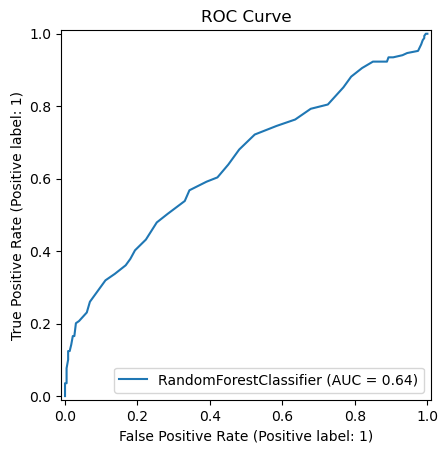

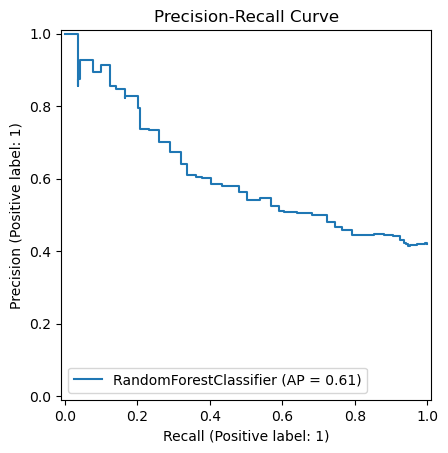


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.83      0.73       233
           1       0.61      0.36      0.45       169

    accuracy                           0.63       402
   macro avg       0.63      0.60      0.59       402
weighted avg       0.63      0.63      0.61       402



In [55]:
print("\nEvaluasi Random Forest Imputer")
evaluate_model(model_rf, X_test_rf, y_test_rf)

In [56]:
#  CROSS VALIDATION
print("Cross Validation Random Forest Imputer")
cross_validate_model(model_rf, df_x_rf, df_y)

Cross Validation Random Forest Imputer
Cross-Validation Accuracy: 0.6280 ± 0.0381
Cross-Validation Precision: 0.5951 ± 0.0863
Cross-Validation Recall: 0.3181 ± 0.0560
Cross-Validation F1: 0.4130 ± 0.0654
Cross-Validation Roc_auc: 0.6488 ± 0.0414



=== Feature Importance - Random Forest Imputer ===
                                         Fitur  Skor Importance
39  left.ventricular.end.diastolic.diameter.LV         0.019725
43                  glomerular.filtration.rate         0.017919
74                   high.sensitivity.troponin         0.017737
44                                    cystatin         0.016846
40                 creatinine.enzymatic.method         0.016463
..                                         ...              ...
38                         acute.renal.failure         0.000120
28                                        AIDS         0.000073
19                   connective.tissue.disease         0.000044
25                          malignant.lymphoma         0.000024
24                                    leukemia         0.000000

[107 rows x 2 columns]


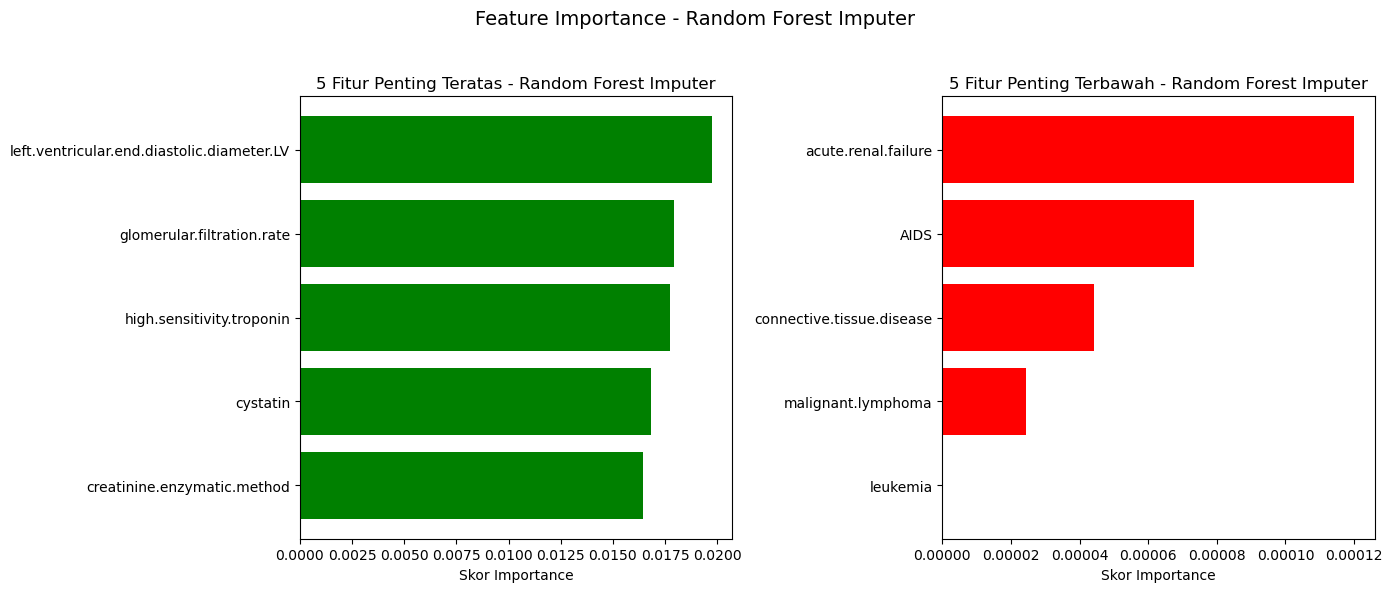

In [57]:
# FEATURE IMPORTANCE & VISUALISASI
plot_feature_importance(model_rf, df_x_rf, "Random Forest Imputer")